In [2]:
import requests

In [ ]:
import os
import textract

In [ ]:
pdf_path = '../data/pdf'

pdfs = []
for f in os.listdir(pdf_path):
    if os.path.isfile(os.path.join(pdf_path, f)):
        pdfs.append(f)
pdfs[:10]

In [ ]:
txt_path = '../data/txt'
if not os.path.exists(txt_path):
    os.mkdir(txt_path)

In [ ]:
txts = []
for f in os.listdir(txt_path):
    if os.path.isfile(os.path.join(txt_path, f)):
        txts.append(f)
txts[:10]

In [ ]:
not_converted_pdfs = []
for pdf in pdfs:
    file_name = os.path.splitext(pdf)[0]
    if file_name + ".txt" not in txts:
        not_converted_pdfs.append(pdf)
len(not_converted_pdfs)
print(not_converted_pdfs)

In [ ]:
for pdf in not_converted_pdfs:
    print(pdf)
    try:
        text = textract.process(os.path.join(pdf_path, pdf))
        with open(os.path.join(txt_path, f'{os.path.splitext(pdf)[0]}.txt'), 'wb') as output_file:
            output_file.write(text)
    except:
        print("Error with following file:", pdf)

#### Extration de mots clés de l'année 1890

In [ ]:
import requests

In [ ]:
import os
import yake

In [3]:
ignored = set(["conseil communal", "conseil général"])
ignored

{'conseil communal', 'conseil général'}

In [13]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=150)
kw_extractor

In [14]:
data_path = "../data/txt/"
files = os.listdir(data_path)

In [15]:
len(files)

2820

In [16]:
files[:20]

['Bxl_1847_Tome_I1_Part_1.txt',
 'Bxl_1847_Tome_I1_Part_2.txt',
 'Bxl_1847_Tome_I1_Part_3.txt',
 'Bxl_1847_Tome_I1_Part_4.txt',
 'Bxl_1847_Tome_I1_Part_5.txt',
 'Bxl_1848_Tome_I1_Part_1.txt',
 'Bxl_1848_Tome_I1_Part_2.txt',
 'Bxl_1848_Tome_I1_Part_3.txt',
 'Bxl_1849_Tome_I1_Part_1.txt',
 'Bxl_1849_Tome_I1_Part_2.txt',
 'Bxl_1849_Tome_I1_Part_3.txt',
 'Bxl_1849_Tome_I1_Part_4.txt',
 'Bxl_1849_Tome_I1_Part_5.txt',
 'Bxl_1849_Tome_II1_Part_1.txt',
 'Bxl_1849_Tome_II1_Part_2.txt',
 'Bxl_1849_Tome_II1_Part_3.txt',
 'Bxl_1849_Tome_II1_Part_4.txt',
 'Bxl_1849_Tome_II1_Part_5.txt',
 'Bxl_1849_Tome_II1_Part_6.txt',
 'Bxl_1849_Tome_II1_Part_7.txt']

In [17]:
bxl_files = [f for f in files if f.startswith('Bxl_')]
len(bxl_files)

2669

In [18]:
this_file = bxl_files[496]
this_file

'Bxl_1890_Tome_I1_Part_1.txt'

In [19]:
text = open(os.path.join(data_path, this_file), 'r').read()
text[:500]

"COMPTE RENDU DE LA SÉANCE DU 27 JANVIER 1890.\n\nN° 1.\n\nVILLE DE BRUXELLES.\n\nBULLETIN C O M M U N A L\nA N N É E\n\nCONSEIL\n\n1890.\n\nCOMMUNAL.\n\nSéance du 27 Janvier\nPrésidence de M . JBULS,\n\n1890.\nBourgmestre.\n\nSOMMAIRE :\n\n1. Concours musical pour le p r i x do Rome. — Lauréat. — Remise\nd'un souvenir à M . Paul Gilson.\n1A. Communications.\n2. 25 anniversaire de l'inauguration de Léopold II. — Communication faite par M . le Bourgmestre.\n2A. Hôpital militaire (ancien). — Nouvelle affectation. — Communica"

In [20]:
keywords = kw_extractor.extract_keywords(text)

In [21]:
keywords

[('VILLE', 0.0007508998794790798),
 ('francs', 0.0007718038748391866),
 ('CONSEIL', 0.0008426858585562232),
 ('Collège', 0.0012718418299366694),
 ('JANVIER', 0.0017952116163171595),
 ('Conseil communal', 0.001798656698985234),
 ('gaz', 0.002223906090688201),
 ('Section', 0.002248231223455087),
 ("C'est", 0.0027831825902573026),
 ('faire', 0.002849337716258425),
 ("qu'il", 0.0029448347338546688),
 ('Service', 0.003436180769327063),
 ('Ministre', 0.004012294917303037),
 ('Messieurs', 0.0041270904470128295),
 ('compteurs', 0.004302389074531893),
 ('règlement', 0.004458067272644791),
 ('Bourgmestre', 0.004806311202126866),
 ("d'un", 0.004823829849463744),
 ('compteur', 0.004947747435711677),
 ('dépenses', 0.0049630751992179355),
 ('Art', 0.005135044250014296),
 ('Conseil supérieur', 0.005373507436179094),
 ('frais', 0.005679864448493789),
 ('Hospices', 0.005718202679948401),
 ("Conseil supérieur d'hygiène", 0.006004103884723049),
 ('ans', 0.006062238741801177),
 ('traitements', 0.006175847

In [22]:
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2 and kw.lower() not in ignored:
        kept.append(kw)
kept

['Conseil supérieur',
 'section néerlandaise',
 "l'honorable Echevin",
 "l'Echevin Walravens",
 "l'Administration communale",
 "d'un compteur",
 'nouveau règlement',
 "Conseil d'administration",
 'Recettes ordinaires',
 'caisse communale',
 "d'une somme",
 'faire faire',
 "ville d'une",
 'Ville place',
 'DÉPENSES Section',
 'Hôpital militaire']

#### Liste des stopwords

In [23]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
sw = stopwords.words("french")
sw += ["du", "un", "une", "en", "dans", "elle", "ils", "ait", "ainsi", "afin", "alors",
      "assez", "as", "aucun", "aurait", "d'abord", "deux", "dessous", "dessus", "dix", "dont",
      "encore", "est", "est-ce", "eurent", "eut", "faut", "hormis", "hors", "elles", "lesquels",
      "malgré", "moins", "mêmes", "notamment", "on", "parfois", "toutefois", "sommes", "voici",
      "étaient", "vos", "les", "zut", "état", "quand", "tellement", "pas", "grâce", "force"]
sw = set(sw)

In [25]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

188 stopwords:
 ['afin', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'alors', 'as', 'assez', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'c', 'ce', 'ces', 'd', "d'abord", 'dans', 'de', 'des', 'dessous', 'dessus', 'deux', 'dix', 'dont', 'du', 'elle', 'elles', 'en', 'encore', 'es', 'est', 'est-ce', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faut', 'force', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'grâce', 'hormis', 'hors', 'il', 'ils', 'j', 'je', 'l', 'la', 'le', 'les', 'lesquels', 'leur', 'lui', 'm', 'ma', 'mais', 'malgré', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'mêmes', 'n', 'ne', 'nos', 'notamment', 'notre', 'nous

In [26]:
year = 1890

In [27]:
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1890_Tome_I1_Part_1.txt',
 'Bxl_1890_Tome_I1_Part_2.txt',
 'Bxl_1890_Tome_I1_Part_3.txt',
 'Bxl_1890_Tome_I1_Part_4.txt',
 'Bxl_1890_Tome_I1_Part_5.txt',
 'Bxl_1890_Tome_I1_Part_6.txt',
 'Bxl_1890_Tome_I1_Part_7.txt',
 'Bxl_1890_Tome_I1_Part_8.txt',
 'Bxl_1890_Tome_I2_Part_1.txt',
 'Bxl_1890_Tome_I2_Part_10.txt',
 'Bxl_1890_Tome_I2_Part_11.txt',
 'Bxl_1890_Tome_I2_Part_12.txt',
 'Bxl_1890_Tome_I2_Part_13.txt',
 'Bxl_1890_Tome_I2_Part_14.txt',
 'Bxl_1890_Tome_I2_Part_2.txt',
 'Bxl_1890_Tome_I2_Part_3.txt',
 'Bxl_1890_Tome_I2_Part_4.txt',
 'Bxl_1890_Tome_I2_Part_5.txt',
 'Bxl_1890_Tome_I2_Part_6.txt',
 'Bxl_1890_Tome_I2_Part_7.txt',
 'Bxl_1890_Tome_I2_Part_8.txt',
 'Bxl_1890_Tome_I2_Part_9.txt',
 'Lkn_1890_Tome_I_Part_1.txt',
 'Lkn_1890_Tome_I_Part_2.txt',
 'Lkn_1890_Tome_I_Part_3.txt',
 'Lkn_1890_Tome_I_Part_4.txt',
 'Lkn_1890_Tome_I_Part_5.txt',
 'Lkn_1890_Tome_I_Part_6.txt',
 'Lkn_1890_Tome_I_Part_7.txt',
 'Lkn_1890_Tome_RptAn_Part_1.txt',
 'Lkn_1890_Tome_RptAn_Part_2.txt',
 'Lk

In [28]:
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [29]:
len(content_list)

33

In [30]:
content_list[0][:300]

"COMPTE RENDU DE LA SÉANCE DU 27 JANVIER 1890.\n\nN° 1.\n\nVILLE DE BRUXELLES.\n\nBULLETIN C O M M U N A L\nA N N É E\n\nCONSEIL\n\n1890.\n\nCOMMUNAL.\n\nSéance du 27 Janvier\nPrésidence de M . JBULS,\n\n1890.\nBourgmestre.\n\nSOMMAIRE :\n\n1. Concours musical pour le p r i x do Rome. — Lauréat. — Remise\nd'un souvenir à M "

In [31]:
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [32]:
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"COMPTE RENDU DE LA SÉANCE DU 27 JANVIER 1890.\n\nN° 1.\n\nVILLE DE BRUXELLES.\n\nBULLETIN C O M M U N A L\nA N N É E\n\nCONSEIL\n\n1890.\n\nCOMMUNAL.\n\nSéance du 27 Janvier\nPrésidence de M . JBULS,\n\n1890.\nBourgmestre.\n\nSOMMAIRE :\n\n1. Concours musical pour le p r i x do Rome. — Lauréat. — Remise\nd'un souvenir à M . Paul Gilson.\n1A. Communications.\n2. 25 anniversaire de l'inauguration de Léopold II. — Communication faite par M . le Bourgmestre.\n2A. Hôpital militaire (ancien). — Nouvelle affectation. — Communica"

In [33]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [34]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1890_clean.txt!'

In [35]:
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'compte rendu séance janvier ville bruxelles bulletin conseil communal séance janvier présidence jbuls bourgmestre sommaire concours musical rome lauréat remise souvenir paul gilson communications anniversaire inauguration léopold communication faite bourgmestre hôpital militaire ancien nouvelle affectation communication faite échevin mot conseil communal composition sections personnel administration vote déle gation donner collège nomination certains emplois hospices approbation actes divers adm'

#### Les nuages de mots de l'anné 1890

In [36]:
frequencies = Counter(after.split())
print(frequencies.most_common(40))

[('francs', 3250), ('conseil', 2657), ('rue', 2356), ('plus', 2287), ('cette', 2023), ('collège', 1828), ('art', 1743), ('bourgmestre', 1601), ('ville', 1585), ('fait', 1536), ('faire', 1511), ('être', 1440), ('service', 1423), ('bruxelles', 1361), ('communal', 1314), ('messieurs', 1174), ('echevin', 1150), ('comme', 1110), ('bien', 1074), ('gaz', 1063), ('budget', 1051), ('rapport', 1045), ('demande', 1034), ('tout', 1028), ('administration', 1007), ('frais', 975), ('travaux', 972), ('tous', 922), ('proposition', 919), ('prix', 914), ('donc', 878), ('question', 877), ('commune', 869), ('dépenses', 862), ('honorable', 855), ('peut', 848), ('compte', 845), ('séance', 807), ('après', 797), ('section', 790)]


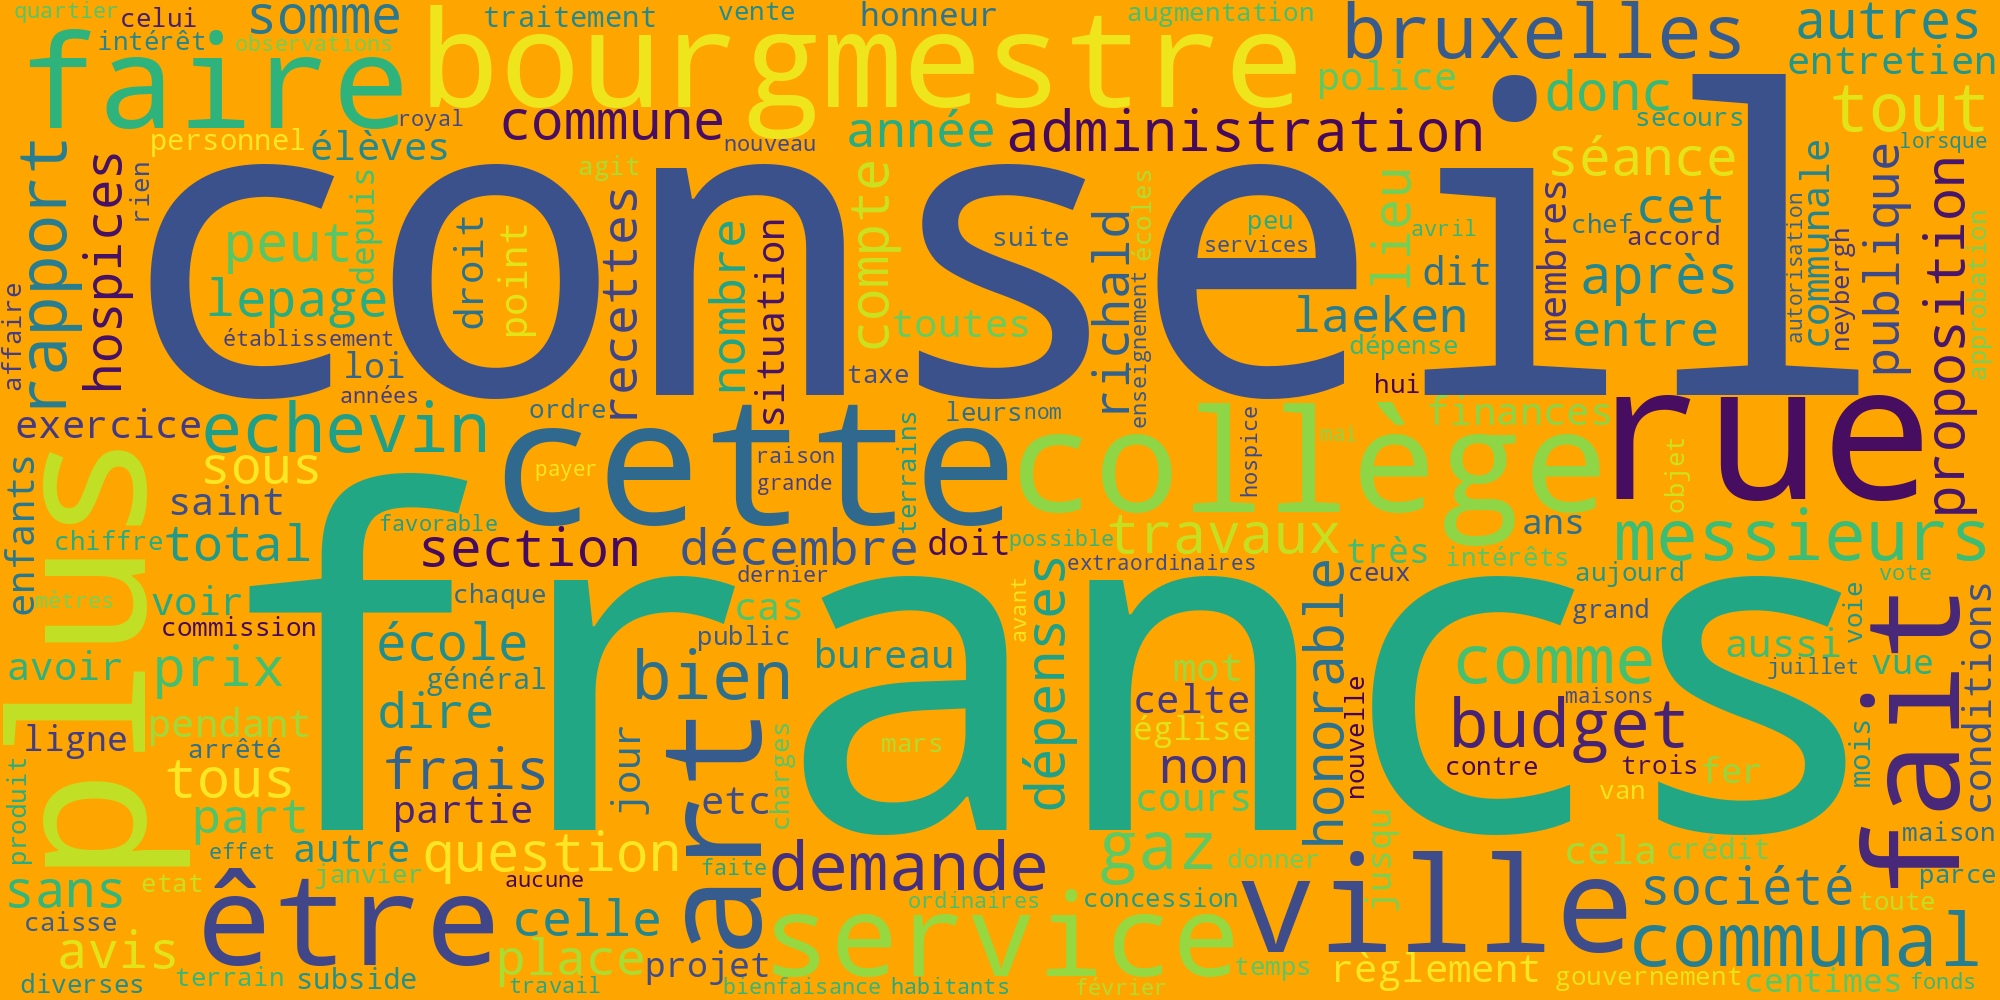

In [39]:
cloud = WordCloud(width=2000, height=1000, background_color='orange').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

#### Analyse de dix phrases de l'année 1890

In [40]:
import requests

In [41]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [42]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [43]:
get_sentiment("Après un travail de 3/4 d'heure, la victime fut retirée vivante et transporté à l'hôpital.")

This text is 80% positive and 0.2% subjective.


In [44]:
get_sentiment("Les agents pompiers et fontainiers remplissent leurs fonctions à l'entière satisfaction de l'Administration communale.")

This text is 15% positive and 0.2% subjective.


In [45]:
get_sentiment("Nous espérons que ce service sera rémunérateur et pourra être maintenu. ")

This text is neutral and perfectly objective.


In [46]:
get_sentiment("Il me semble, Messieurs, que cette question mérite un examen très sérieux de notre part, et qu'il ne faut pas lui opposer un veto absolu.  ")

This text is 45% positive and 0.6% subjective.


In [47]:
get_sentiment("Je désirerais connaître quelle est la situation financière actuelle de cette société avant de prendre une détermination au sujet de sa demande.")

This text is 10% positive and 0.1% subjective.


In [48]:
get_sentiment("Dans cet espoir, nous avons l'honneur, Messieurs, de vous présenter l'assurance de notre parfaite considération et de notre profonde estime. ")

This text is 53% positive and 0.55% subjective.


In [49]:
get_sentiment("Il faut arrêter cette progression constante de dépenses.")

This text is 10% positive and 0.1% subjective.


In [50]:
get_sentiment("Enfin, la Ville déshéritée des quatre cinquièmes de la succession, ne saurait assumer l'entretien des deux lombes, et il n'est pas possible de limiter cet entretien à un cinquième. ")

This text is 12% negative and perfectly objective.


In [51]:
get_sentiment("Les Gantois, malgré la perte de leur chef, continuèrent encore pendant quelque temps la lutte avec courage, mais ils finirent par céder; le comté de Flandre était alors entre les mains d'un prince français, Philippe-le-Hardi, duc de Bourgogne, qui avait épousé l'héritière de Flandre. ")

This text is 20% positive and 0.1% subjective.


In [52]:
get_sentiment("Une femme se trouvait à proximité d'une lampe à pétrole qui a tait explosion ; elle a été brûlée aux bras et transportée à l'hôpital.")

This text is 10% negative and 0.1% subjective.
